In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix, plot_roc_curve, plot_precision_recall_curve,roc_curve,roc_auc_score, precision_recall_curve, auc
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
# Suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

Credentials  Age  Test Scores  Performance
0           53   30           57            0
1           43   30           68            1
2           57   37           63            1
3           43   29           62            0
4           60   34           60            1

# 1. Data Preprocessing

In [4]:
# Check the shape of the dataset (number of rows and columns)
print(data.shape)

(1000, 4)


In [5]:
# Check the data types of variables
print(data.dtypes)

Credentials    int64
Age            int64
Test Scores    int64
Performance    int64
dtype: object


In [6]:
# Check the number of missing values in each column
print(data.isnull().sum())

Credentials    0
Age            0
Test Scores    0
Performance    0
dtype: int64


In [7]:
# Check the overall data quality
print(data.describe())

       Credentials          Age  Test Scores  Performance
count  1000.000000  1000.000000  1000.000000  1000.000000
mean     50.089000    30.093000    60.228000     0.497000
std       5.953362     4.934846     5.997999     0.500241
min      33.000000    12.000000    35.000000     0.000000
25%      46.000000    27.000000    56.000000     0.000000
50%      50.000000    30.000000    60.000000     0.000000
75%      54.000000    33.000000    65.000000     1.000000
max      72.000000    47.000000    82.000000     1.000000


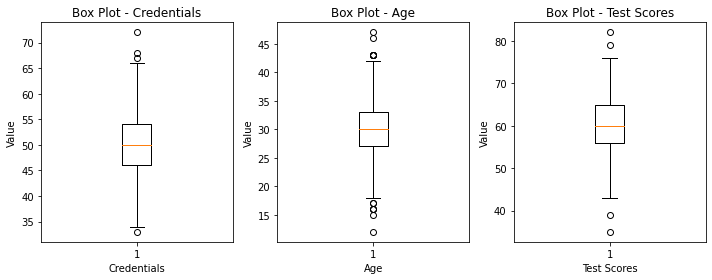

In [8]:
# Assuming you have your data in a DataFrame called 'data'
credentials = data['Credentials']
age = data['Age']
test_scores = data['Test Scores']

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

# Create box plots for Credentials, Age, and Test Scores
axes[0].boxplot(credentials)
axes[0].set_xlabel('Credentials')
axes[0].set_ylabel('Value')
axes[0].set_title('Box Plot - Credentials')

axes[1].boxplot(age)
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Value')
axes[1].set_title('Box Plot - Age')

axes[2].boxplot(test_scores)
axes[2].set_xlabel('Test Scores')
axes[2].set_ylabel('Value')
axes[2].set_title('Box Plot - Test Scores')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

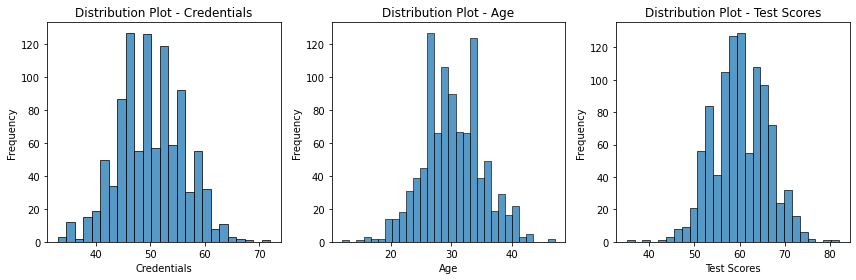

In [9]:
# Assuming you have your data in a DataFrame called 'data'
credentials = data['Credentials']
age = data['Age']
test_scores = data['Test Scores']

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Create distribution plots for Credentials, Age, and Test Scores
sns.histplot(credentials, ax=axes[0])
axes[0].set_xlabel('Credentials')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution Plot - Credentials')

sns.histplot(age, ax=axes[1])
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution Plot - Age')

sns.histplot(test_scores, ax=axes[2])
axes[2].set_xlabel('Test Scores')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution Plot - Test Scores')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


### Interpreting the descriptive stats
* Based on the provided descriptive statistics, here are some observations and considerations about the data:

* Outliers: There are no extreme values that stand out as potential outliers in any of the variables (Credentials, Age, Test Scores, Performance). The minimum and maximum values for each variable appear to be within a reasonable range.

* Data Distribution: The mean and median values for Credentials, Age, and Test Scores are relatively close to each other, suggesting a relatively symmetrical distribution. 

* Data Quality: The standard deviation values for each variable (Credentials, Age, Test Scores) are relatively small compared to the range of values, indicating relatively low variability within each variable. This suggests that the data points are relatively close to the mean.

### Scaling

In [15]:
variables_to_scale = ['Credentials', 'Age', 'Test Scores']

# Separate the target variable from the input features
X = data[variables_to_scale]
y = data['Performance']

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler on the input features only
scaled_data = scaler.fit_transform(X)

# Create a new DataFrame with the scaled input features
X_scaled = pd.DataFrame(scaled_data, columns=variables_to_scale)

# Combine the scaled input features with the unscaled target variable
data = pd.concat([X_scaled, y], axis=1)

In [16]:
data.head()

Credentials       Age  Test Scores  Performance
0     0.489212 -0.018855    -0.538449            0
1    -1.191352 -0.018855     1.296414            1
2     1.161437  1.400339     0.462385            1
3    -1.191352 -0.221597     0.295580            0
4     1.665607  0.792113    -0.038032            1

In [12]:
data_scaled.describe()

Credentials           Age   Test Scores  Performance
count  1.000000e+03  1.000000e+03  1.000000e+03  1000.000000
mean   2.327027e-16  2.553513e-17 -2.578146e-16     0.497000
std    1.000500e+00  1.000500e+00  1.000500e+00     0.500241
min   -2.871915e+00 -3.668210e+00 -4.208174e+00     0.000000
25%   -6.871825e-01 -6.270809e-01 -7.052545e-01     0.000000
50%   -1.495702e-02 -1.885500e-02 -3.803170e-02     0.000000
75%    6.572684e-01  5.893709e-01  7.959968e-01     1.000000
max    3.682283e+00  3.427758e+00  3.631694e+00     1.000000

* Feature Comparability: Scaling ensures that all features are on a similar scale, which allows for a fair comparison between different features. If the features have different scales, some features with larger numerical values may dominate the model's learning process or have a larger impact on the model's predictions, regardless of their actual importance.

* Gradient Descent Convergence: Many machine learning algorithms use optimization techniques, such as gradient descent, to minimize an objective function. Scaling the features can help the optimization process converge more quickly because the features are on a similar scale, and the learning algorithm can more easily navigate the feature space.

* Model Performance: Scaling can improve the performance of certain machine learning algorithms. 

* Regularization: Regularization techniques penalize large coefficient values. Scaling the features ensures that all features are penalized equally and prevents regularization from being biased towards features with larger scales.

* Interpretability: Scaling can improve the interpretability of the model's coefficients. When features are on a similar scale, the coefficients represent the relative importance of each feature in the model more accurately.

# 2. Feature selection

### Relationships between Variables:

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), vmin=-1, cmap="plasma_r", annot=True)

### Why the correlation matrix is important:

* Strength and Direction of Relationships: The correlation coefficient ranges from -1 to 1. A value close to 1 indicates a strong positive correlation, meaning that as one variable increases, the other variable tends to increase as well. A value close to -1 indicates a strong negative correlation, implying that as one variable increases, the other variable tends to decrease. A value close to 0 suggests little to no correlation between the variables.

* Identifying Patterns: By examining the correlation matrix, you can identify patterns and relationships between variables. Variables with high positive correlations or high negative correlations indicate a strong linear relationship. On the other hand, low or close-to-zero correlations indicate little to no linear relationship.

* Multicollinearity: The correlation matrix helps detect multicollinearity, which occurs when two or more predictor variables are highly correlated with each other. High correlations between predictors can pose challenges in interpreting the coefficients and lead to instability in the model. In such cases, you might consider removing one of the highly correlated variables or applying dimensionality reduction techniques.

* Feature Selection: Correlation analysis can guide feature selection by identifying variables that are highly correlated with the target variable. Variables with high positive or negative correlations with the target variable are likely to be strong predictors and may be important for the model's performance.

* Model Building: Based on the correlations, you can make informed decisions about which variables to include or exclude from the model. Variables with low correlations with the target variable or with high correlations with other predictors might be less useful in predicting the target variable and can be considered for exclusion.

### Insights from correlation matrix
* multicollinearity: There are no predictor variables are highly correlated with each other. 
* There is a strong positive relationship between perfomance and predictor variable Test scores.
* There is a moderate positive relationship between perfomance and predictor variable credentials.
* There is a weak positive relationship between perfomance and predictor variable Age.

### Recursive feature elimination
Given an external estimator that assigns weights to features, recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [19]:
# Assuming you have your data in a DataFrame called 'data'
X = data[['Credentials', 'Age', 'Test Scores']]
y = data['Performance']

# Create an instance of the logistic regression model
model = LogisticRegression()

# Create an instance of the RFE with the logistic regression model
rfe = RFE(estimator=model, n_features_to_select=1)

# Fit the RFE model on the data
rfe.fit(X, y)

# Get the rankings of the features
feature_rankings = rfe.ranking_

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print the feature rankings and selected features
for feature, ranking in zip(X.columns, feature_rankings):
    print(f"Feature: {feature}, Ranking: {ranking}")

print("Selected Features:")
print(selected_features)

Feature: Credentials, Ranking: 2
Feature: Age, Ranking: 3
Feature: Test Scores, Ranking: 1
Selected Features:
Index(['Test Scores'], dtype='object')


### Feature ranking with recursive feature elimination and cross-validation
RFECV performs RFE in a cross-validation loop to find the optimal number or the best number of features. Hereafter a recursive feature elimination applied on logistic regression with automatic tuning of the number of features selected with cross-validation.

In [22]:
# Assuming you have your data in a DataFrame called 'data'
X = data[['Credentials', 'Age', 'Test Scores']]
y = data['Performance']

# Create an instance of the logistic regression model
model = LogisticRegression()

# Create an instance of the StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5)

# Create an instance of the RFECV with the logistic regression model and cross-validation
rfecv = RFECV(estimator=model, cv=cv)

# Fit the RFECV model on the data
rfecv.fit(X, y)

# Get the rankings of the features
feature_rankings = rfecv.ranking_

# Get the selected features
selected_features = X.columns[rfecv.support_]

# Print the feature rankings and selected features
for feature, ranking in zip(X.columns, feature_rankings):
    print(f"Feature: {feature}, Ranking: {ranking}")

print("Selected Features:")
print(selected_features)

Feature: Credentials, Ranking: 1
Feature: Age, Ranking: 2
Feature: Test Scores, Ranking: 1
Selected Features:
Index(['Credentials', 'Test Scores'], dtype='object')


# 3. Model fitting with only the selected best fit predicting variables

In [24]:
# Assuming you have your data in a DataFrame called 'data'
X = data[['Credentials', 'Test Scores']]
y = data['Performance']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the logistic regression model
model = LogisticRegression()

# Fit the logistic regression model on the training data
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model on the test set
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.88
